Dataset loaded successfully!
Original shape: (4240, 16)
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.

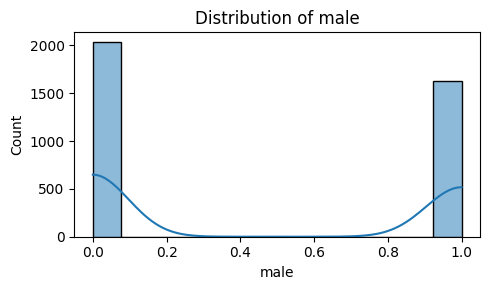

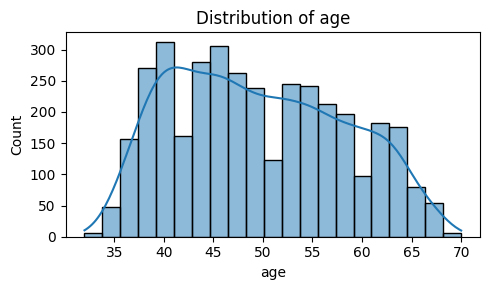

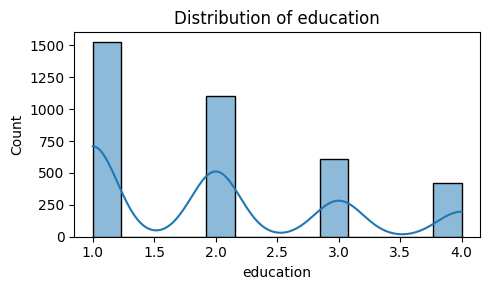

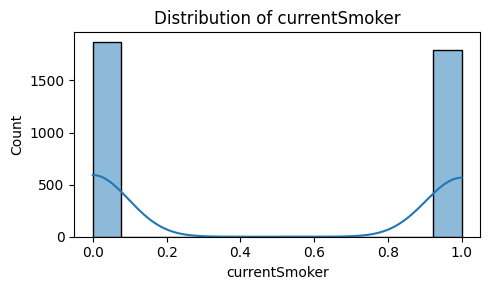

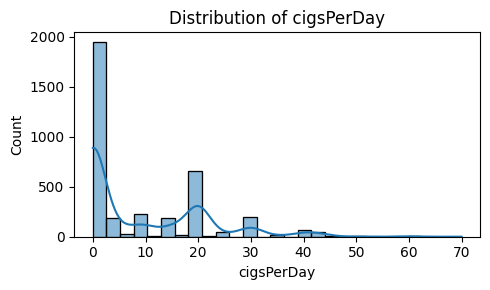

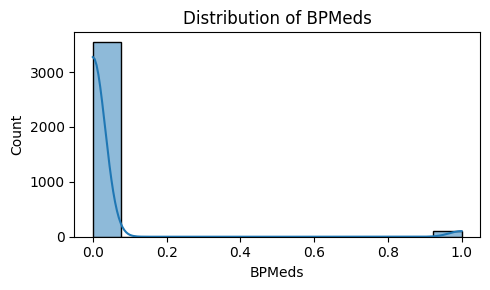

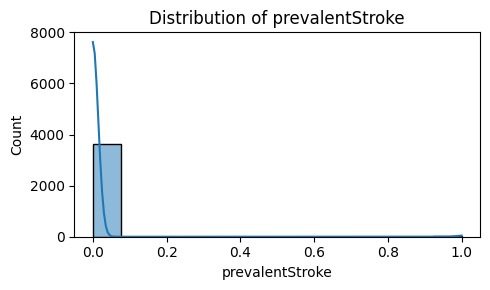

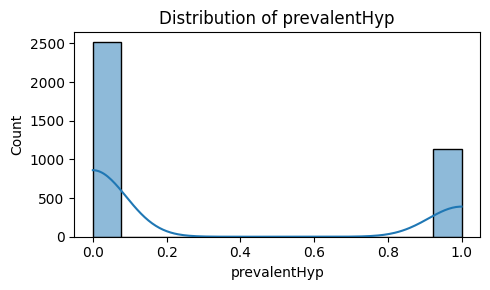

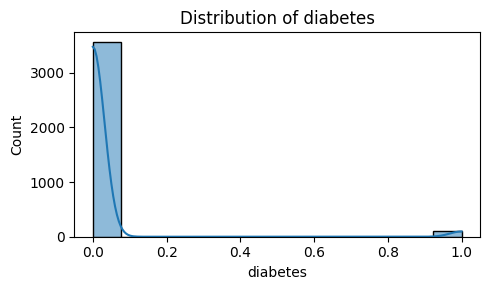

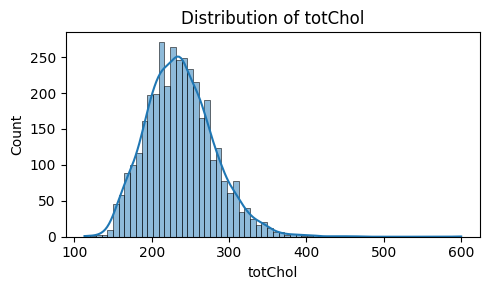

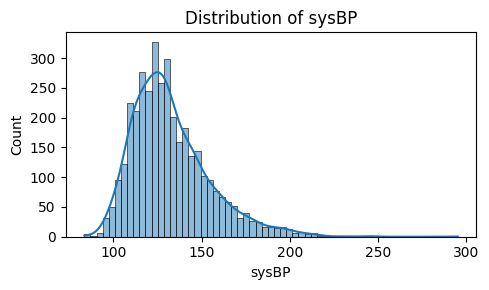

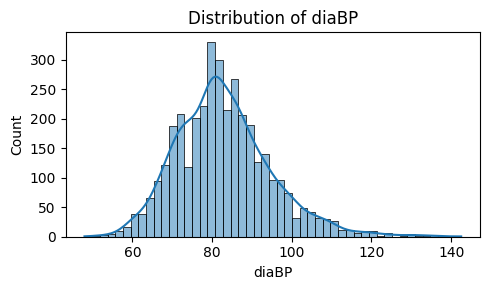

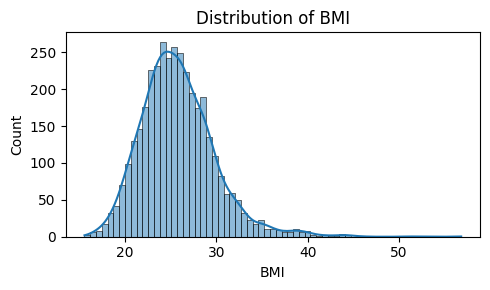

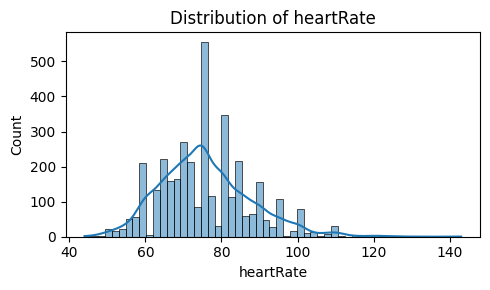

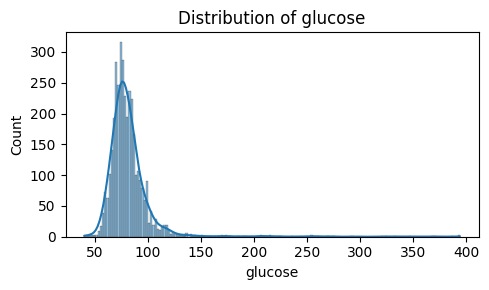

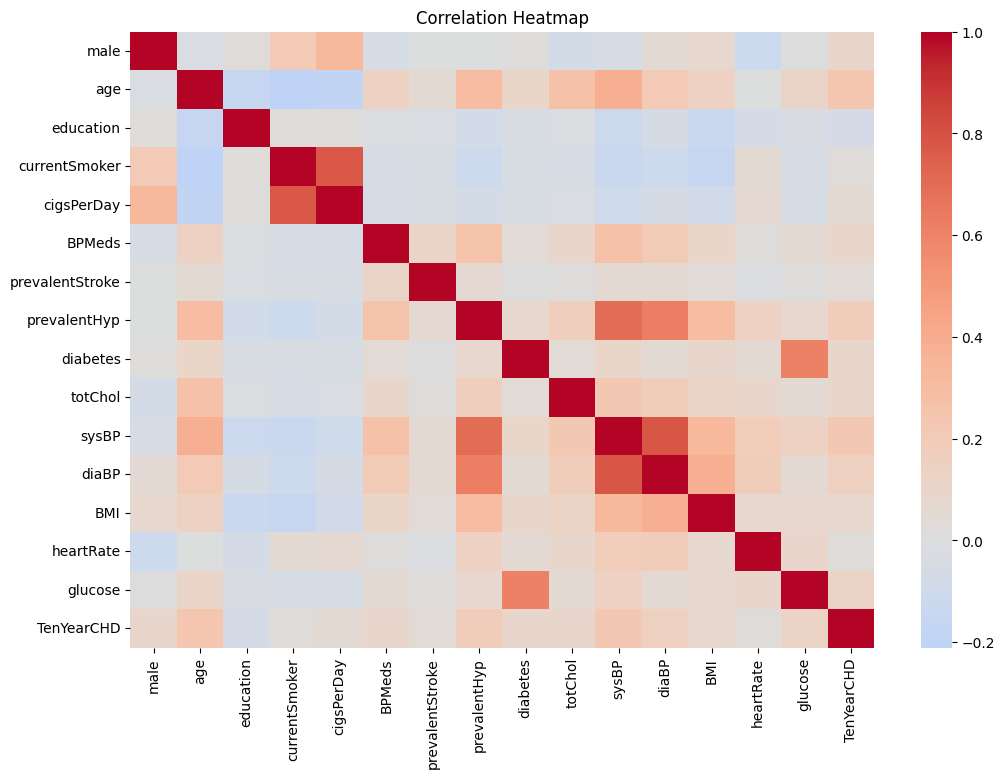

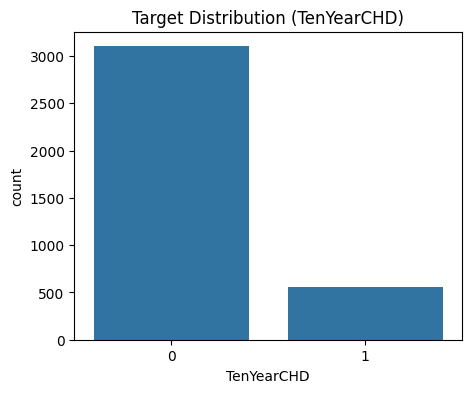

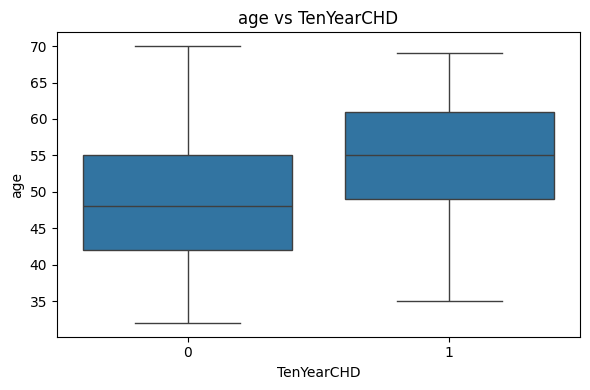

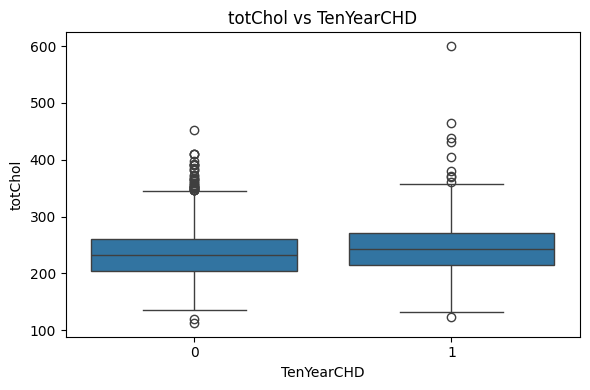

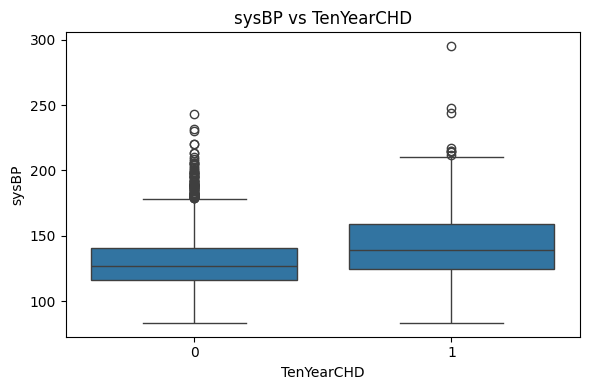

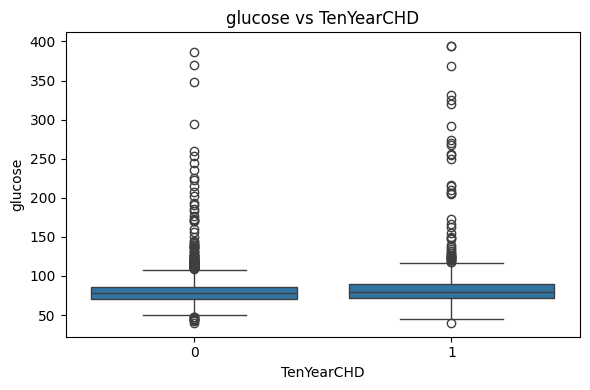

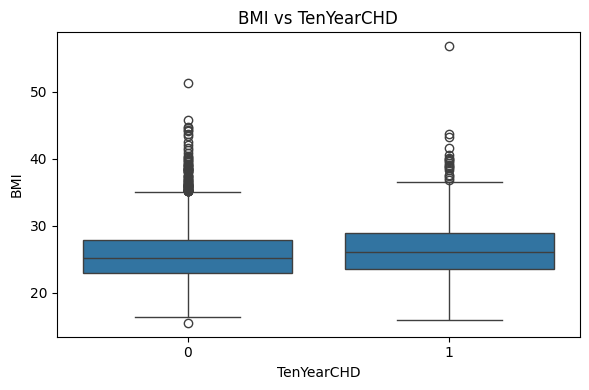


✅ Preprocessing + EDA completed successfully!


In [1]:
#!/usr/bin/env python
# coding: utf-8

# --- 01 DATA PREPROCESSING ---
# Questo notebook prepara un dataset pulito e consistente da usare
# in tutti gli altri notebook (baseline reale, CTGAN, TVAE, ecc.)

import pandas as pd
import numpy as np

# ------------------------------------------------------
# 1. Load raw data
# ------------------------------------------------------
file_path = "../data/raw/framingham.csv"
df = pd.read_csv(file_path)

print("Dataset loaded successfully!")
print(f"Original shape: {df.shape}")
print(df.head())

# ------------------------------------------------------
# 2. Clean NaNs (simple strategy: remove rows with missing values)
# ------------------------------------------------------
df = df.dropna()
print(f"After removing NaNs: {df.shape}")

# ------------------------------------------------------
# 3. Column type standardization
# ------------------------------------------------------
categorical_cols = [
    'male', 'currentSmoker', 'prevalentStroke',
    'prevalentHyp', 'diabetes'
]

df[categorical_cols] = df[categorical_cols].astype(int)

# ------------------------------------------------------
# 4. Reorder columns (target as last column)
# ------------------------------------------------------
target = "TenYearCHD"
cols = [c for c in df.columns if c != target] + [target]
df = df[cols]

# ------------------------------------------------------
# 5. Save clean dataset (NO scaling, NO transformations)
# ------------------------------------------------------
clean_path = "../data/processed/framingham_clean.csv"
df.to_csv(clean_path, index=False)

print(f"Clean dataset saved to {clean_path}")
print(df.head())

# ------------------------------------------------------
# 6. Summary statistics
# ------------------------------------------------------
print("\nSummary Statistics:")
print(df.describe().T)

# ------------------------------------------------------
# 7. Basic EDA & Visualizations
# ------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of numerical variables
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns.drop(target)

for col in numerical_cols:
    plt.figure(figsize=(5, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# Target balance
plt.figure(figsize=(5, 4))
sns.countplot(x=target, data=df)
plt.title("Target Distribution (TenYearCHD)")
plt.show()

# Boxplots for important clinical variables
important_vars = ["age", "totChol", "sysBP", "glucose", "BMI"]

for col in important_vars:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=target, y=col, data=df)
        plt.title(f"{col} vs {target}")
        plt.tight_layout()
        plt.show()

print("\n\u2705 Preprocessing + EDA completed successfully!")